In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/week2_python_task/flight.csv')

In [4]:
data.head(15)

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0            0   70172    Male     Loyal Customer   13  Personal Travel   
1            1    5047    Male  disloyal Customer   25  Business travel   
2            2  110028  Female     Loyal Customer   26  Business travel   
3            3   24026  Female     Loyal Customer   25  Business travel   
4            4  119299    Male     Loyal Customer   61  Business travel   
5            5  111157  Female     Loyal Customer   26  Personal Travel   
6            6   82113    Male     Loyal Customer   47  Personal Travel   
7            7   96462  Female     Loyal Customer   52  Business travel   
8            8   79485  Female     Loyal Customer   41  Business travel   
9            9   65725    Male  disloyal Customer   20  Business travel   
10          10   34991  Female  disloyal Customer   24  Business travel   
11          11   51412  Female     Loyal Customer   12  Personal Travel   
12          12   98628    Male     Loyal Customer   53  Business travel   
13          13   83502    Male     Loyal Customer   33  Personal Travel   
14          14   95789  Female     Loyal Customer   26  Personal Travel   

       Class  Flight Distance  Inflight wifi service  \
0   Eco Plus              460                      3   
1   Business              235                      3   
2   Business             1142                      2   
3   Business              562                      2   
4   Business              214                      3   
5        Eco             1180                      3   
6        Eco             1276                      2   
7   Business             2035                      4   
8   Business              853                      1   
9        Eco             1061                      3   
10       Eco             1182                      4   
11  Eco Plus              308                      2   
12       Eco              834                      1   
13       Eco              946                      4   
14       Eco              453                      3   

    Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                   4  ...                       5   
1                                   2  ...                       1   
2                                   2  ...                       5   
3                                   5  ...                       2   
4                                   3  ...                       3   
5                                   4  ...                       1   
6                                   4  ...                       2   
7                                   3  ...                       5   
8                                   2  ...                       1   
9                                   3  ...                       2   
10                                  5  ...                       2   
11                                  4  ...                       1   
12                                  4  ...                       1   
13                                  2  ...                       4   
14                                  2  ...                       2   

    On-board service  Leg room service  Baggage handling  Checkin service  \
0                  4                 3                 4                4   
1                  1                 5                 3                1   
2                  4                 3                 4                4   
3                  2                 5                 3                1   
4                  3                 4                 4                3   
5                  3                 4                 4                4   
6                  3                 3                 4                3   
7                  5                 5                 5                4   
8                  1                 2                 1                4   
9              

In [5]:
data.shape

(103904, 25)

In [6]:
data.drop(['Unnamed: 0','id'], axis=1, inplace=True)
data.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
1                       3              3  ...                       1   
2                       2              2  ...                       5   
3                       5              5  ...                       2   
4                       3              3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 23 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
data.describe().T

count         mean         std   min  \
Age                                103904.0    39.379706   15.114964   7.0   
Flight Distance                    103904.0  1189.448375  997.147281  31.0   
Inflight wifi service              103904.0     2.729683    1.327829   0.0   
Departure/Arrival time convenient  103904.0     3.060296    1.525075   0.0   
Ease of Online booking             103904.0     2.756901    1.398929   0.0   
Gate location                      103904.0     2.976883    1.277621   0.0   
Food and drink                     103904.0     3.202129    1.329533   0.0   
Online boarding                    103904.0     3.250375    1.349509   0.0   
Seat comfort                       103904.0     3.439396    1.319088   0.0   
Inflight entertainment             103904.0     3.358158    1.332991   0.0   
On-board service                   103904.0     3.382363    1.288354   0.0   
Leg room service                   103904.0     3.351055    1.315605   0.0   
Baggage handling                   103904.0     3.631833    1.180903   1.0   
Checkin service                    103904.0     3.304290    1.265396   0.0   
Inflight service                   103904.0     3.640428    1.175663   0.0   
Cleanliness                        103904.0     3.286351    1.312273   0.0   
Departure Delay in Minutes         103904.0    14.815618   38.230901   0.0   
Arrival Delay in Minutes           103594.0    15.178678   38.698682   0.0   

                                     25%    50%     75%     max  
Age                                 27.0   40.0    51.0    85.0  
Flight Distance                    414.0  843.0  1743.0  4983.0  
Inflight wifi service                2.0    3.0     4.0     5.0  
Departure/Arrival time convenient    2.0    3.0     4.0     5.0  
Ease of Online booking               2.0    3.0     4.0     5.0  
Gate location                        2.0    3.0     4.0     5.0  
Food and drink                       2.0    3.0     4.0     5.0  
Online boarding                      2.0    3.0     4.0     5.0  
Seat comfort                         2.0    4.0     5.0     5.0  
Inflight entertainment               2.0    4.0     4.0     5.0  
On-board service                     2.0    4.0     4.0     5.0  
Leg room service                     2.0    4.0     4.0     5.0  
Baggage handling                     3.0    4.0     5.0     5.0  
Checkin service                      3.0    3.0     4.0     5.0  
Inflight service                     3.0    4.0     5.0     5.0  
Cleanliness                          2.0    3.0     4.0     5.0  
Departure Delay in Minutes           0.0    0.0    12.0  1592.0  
Arrival Delay in Minutes             0.0    0.0    13.0  1584.0

In [9]:
data.duplicated().sum()

0

In [10]:
df1 = data.copy()

In [11]:
df1.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [12]:
Null_values = df1.loc[df1['Arrival Delay in Minutes'].isnull()]
Null_values

Gender      Customer Type  Age   Type of Travel     Class  \
213     Female     Loyal Customer   38  Business travel       Eco   
1124      Male     Loyal Customer   53  Personal Travel       Eco   
1529      Male     Loyal Customer   39  Business travel  Business   
2004    Female  disloyal Customer   26  Business travel  Business   
2108    Female     Loyal Customer   24  Personal Travel       Eco   
...        ...                ...  ...              ...       ...   
102067    Male     Loyal Customer   49  Personal Travel  Eco Plus   
102384    Male     Loyal Customer   58  Business travel       Eco   
102552  Female  disloyal Customer   29  Business travel       Eco   
102960    Male     Loyal Customer   58  Business travel       Eco   
103540  Female     Loyal Customer   33  Personal Travel       Eco   

        Flight Distance  Inflight wifi service  \
213                 109                      5   
1124               1012                      3   
1529                733                      2   
2004               1035                      3   
2108                417                      2   
...                 ...                    ...   
102067             1249                      2   
102384              733                      3   
102552             1107                      2   
102960             1088                      4   
103540              359                      4   

        Departure/Arrival time convenient  Ease of Online booking  \
213                                     3                       3   
1124                                    2                       3   
1529                                    5                       5   
2004                                    3                       3   
2108                                    1                       2   
...                                   ...                     ...   
102067                                  5                       2   
102384                                  3                       3   
102552                                  1                       1   
102960                                  4                       1   
103540                                  4                       4   

        Gate location  ...  Inflight entertainment  On-board service  \
213                 3  ...                       5                 5   
1124                4  ...                       4                 4   
1529                5  ...                       2                 2   
2004                1  ...                       2                 3   
2108                2  ...                       5                 1   
...               ...  ...                     ...               ...   
102067              3  ...                       3                 4   
102384              3  ...                       3                 3   
102552              1  ...                       5                 4   
102960              1  ...                       5                 1   
103540              3  ...                       4                 3   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
213                    2                 4                1                 1   
1124                   4                 4                3                 3   
1529                   2                 2                2                 2   
2004                   3                 4                5                 5   
2108                   4                 2                1                 2   
...                  ...               ...              ...               ...   
102067                 5                 4                3                 4   
102384                 1                 2                4                 2   
102552                 1                 5                5                 3   
102960                 5                 5                5               

Text(145.72222222222223, 0.5, 'Data Index')

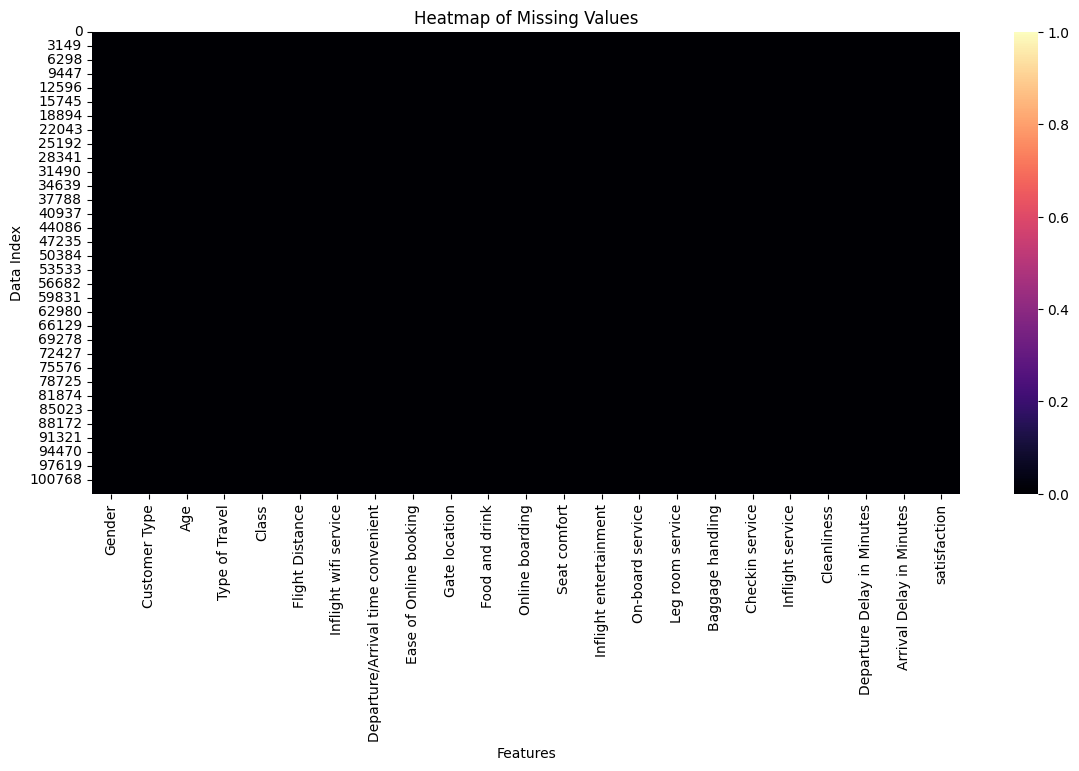

In [13]:
# heatmap for visualizing missing or null values

plt.figure(figsize=(14, 6))
sns.heatmap(df1.isnull(), cmap='magma')

plt.title('Heatmap of Missing Values')
plt.xlabel('Features')
plt.ylabel('Data Index')

In [14]:
# df1["Arrival Delay in Minutes"] = df1["Arrival Delay in Minutes"].fillna(df1["Arrival Delay in Minutes"].mean())  #using mean replace null values

In [15]:
#df1["Arrival Delay in Minutes"] = df1["Arrival Delay in Minutes"].fillna(df1["Arrival Delay in Minutes"].median())  #using median replace null values

In [16]:
# df1["Arrival Delay in Minutes"] = df1["Arrival Delay in Minutes"].fillna(df1["Arrival Delay in Minutes"].std())    #using std replace null values

In [17]:
# df1 = df1.dropna()    #dropping null values

In [18]:
#using randomforest regressor for filling null values
from sklearn.ensemble import RandomForestRegressor
df_missing = df1[df1['Arrival Delay in Minutes'].isnull()]
df_not_missing = df1.dropna(subset=['Arrival Delay in Minutes'])
X_train = df_not_missing[['Departure Delay in Minutes']]
y_train = df_not_missing['Arrival Delay in Minutes']
model = RandomForestRegressor()
model.fit(X_train, y_train)
X_missing = df_missing[['Departure Delay in Minutes']]
predicted_values = model.predict(X_missing)
df1.loc[df1['Arrival Delay in Minutes'].isnull(), 'Arrival Delay in Minutes'] = predicted_values

In [19]:
df1.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [20]:
print("The numerical features are:")
num_features = df1.select_dtypes(include=['int64', 'float64'])
for c in num_features.columns:
    print(c)

The numerical features are:
Age
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes


In [21]:
print("The categorical features are:")
cat_features = df1.select_dtypes(include=['object'])
for c in cat_features:
    print(c)

The categorical features are:
Gender
Customer Type
Type of Travel
Class
satisfaction


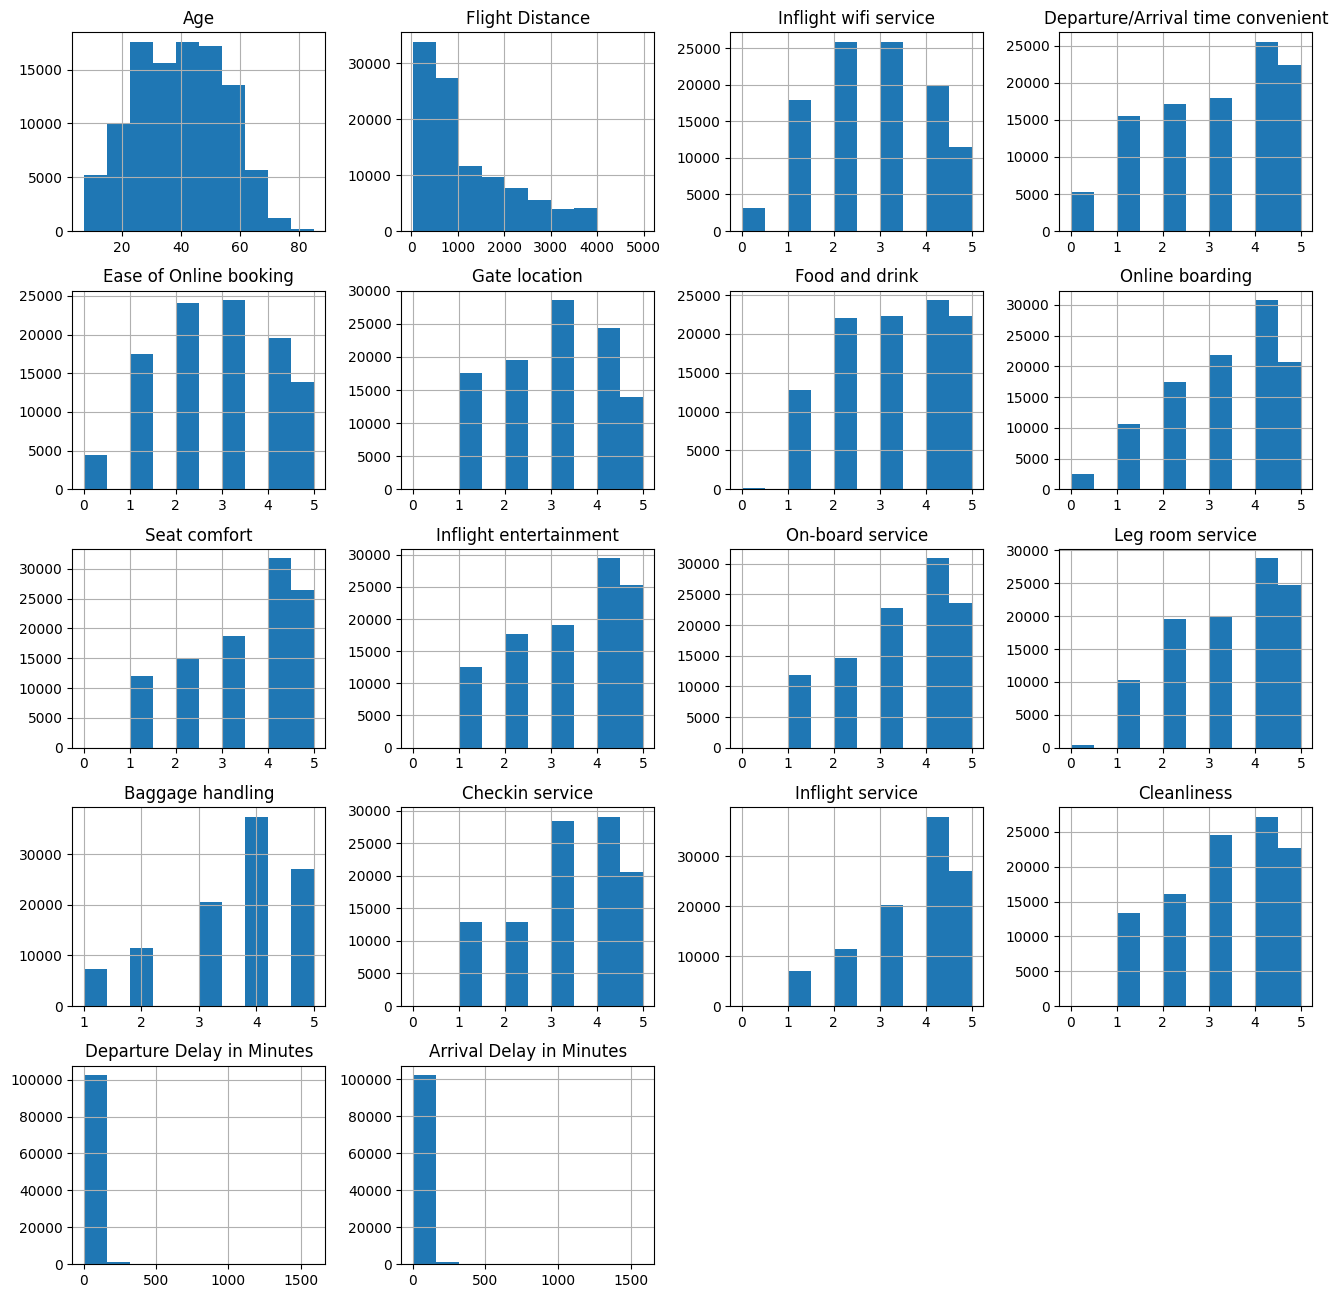

In [22]:
df1.hist(figsize=(16, 16))
plt.show()

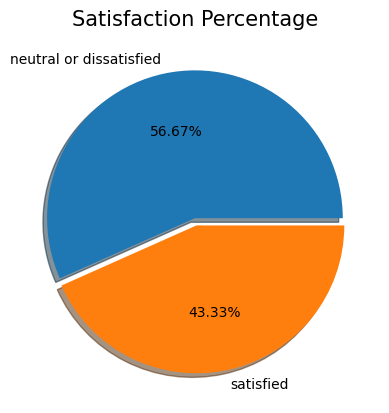

In [23]:
plt.pie(df1['satisfaction'].value_counts(), labels=["neutral or dissatisfied","satisfied"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Satisfaction Percentage', fontsize=15)
plt.show()

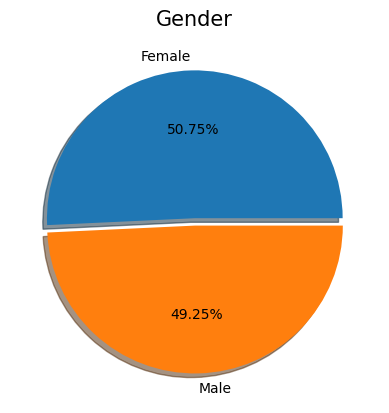

In [24]:
plt.pie(df1['Gender'].value_counts(), labels=["Female","Male"], explode=[0, 0.05], autopct='%1.2f%%', shadow=True)
plt.title('Gender', fontsize=15)
plt.show()

Male and Female passengers counts are more are less equal

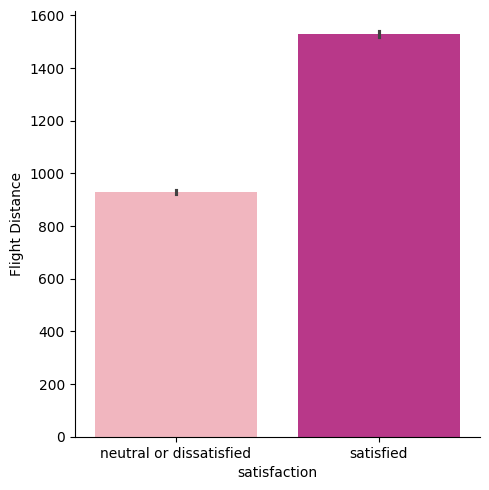

In [25]:
g = sns.catplot(x="satisfaction", y="Flight Distance", data=df1, kind="bar", hue="satisfaction", palette="RdPu")

Satisfied people count is more than neutral or dissatisfied

---



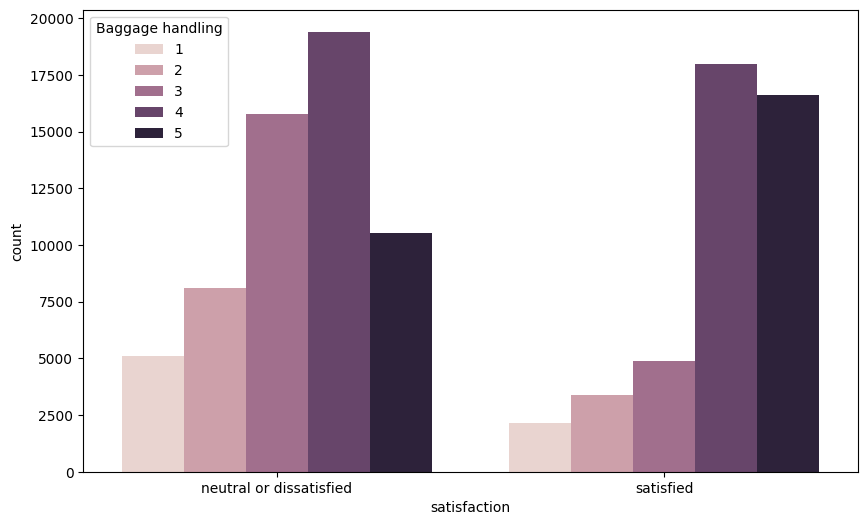

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x ='satisfaction', hue = "Baggage handling", data = df1)
plt.show()

Dissatisfied or neutral count more than satisfied count

---



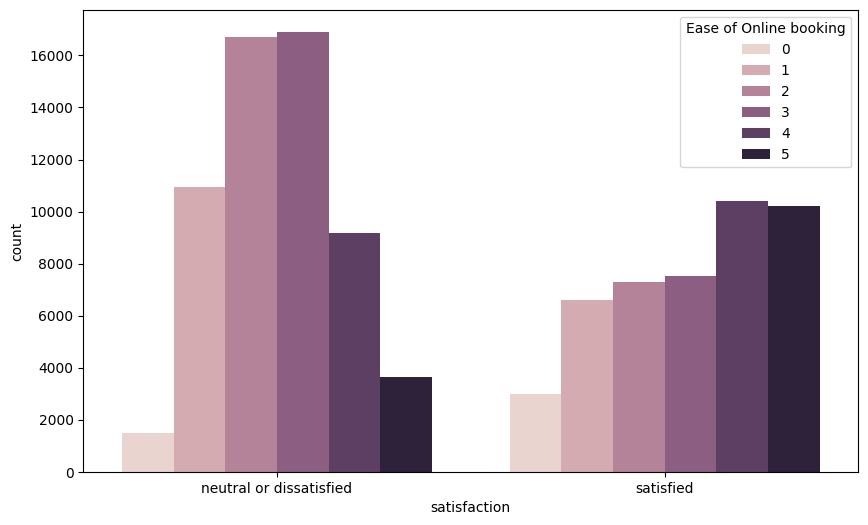

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x ='satisfaction', hue = "Ease of Online booking", data = df1)
plt.show()

Online booking is not liked by many people

Text(0.5, 0, 'Clealiness')

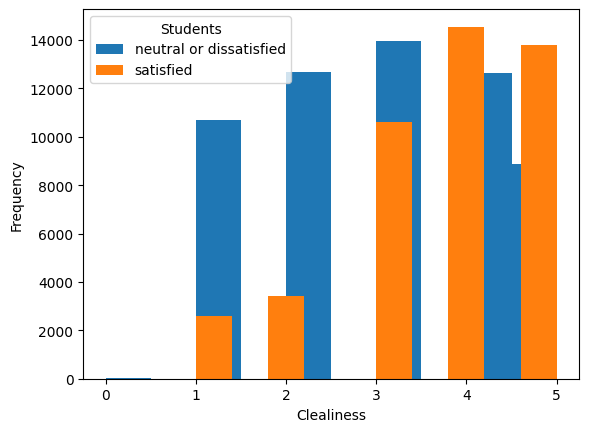

In [28]:
df1.groupby('satisfaction')['Cleanliness'].plot(kind='hist')
plt.legend(['neutral or dissatisfied', 'satisfied'], title='Students')
# Add x-axis label
plt.xlabel('Clealiness')

Clealiness is liked by most of the people

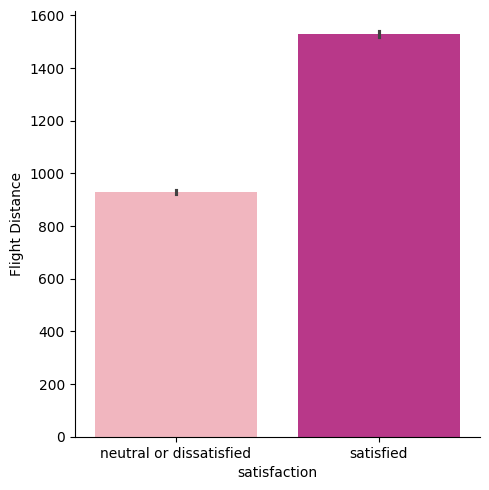

In [29]:
g = sns.catplot(x="satisfaction", y="Flight Distance", data=df1, kind="bar", hue="satisfaction", palette="RdPu")

<ipython-input-30-a9bd6f91a2ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age',data=df1, palette="magma")


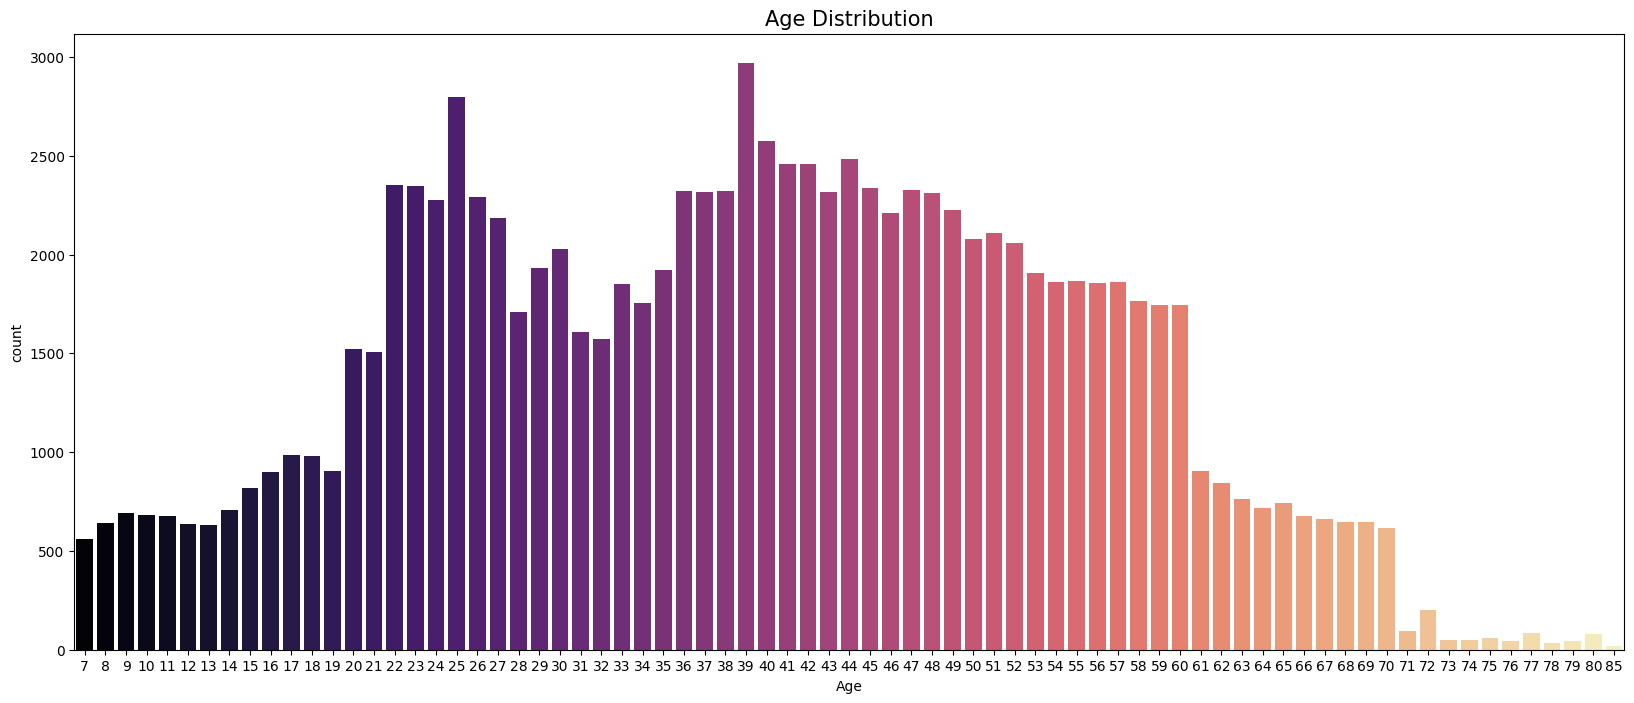

In [30]:
plt.figure(figsize=(20,8))
sns.countplot(x='Age',data=df1, palette="magma")
plt.title('Age Distribution', fontsize=15)
plt.show()

In [31]:
tf =df1[["satisfaction"]].value_counts()
tf

satisfaction           
neutral or dissatisfied    58879
satisfied                  45025
dtype: int64

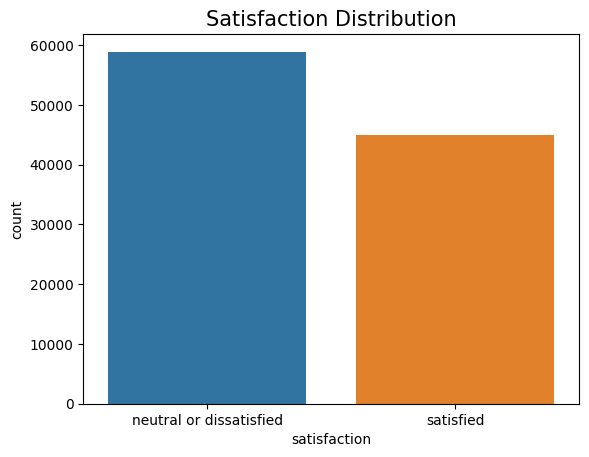

In [32]:
sns.countplot(x='satisfaction',data=df1, hue="satisfaction")
plt.title('Satisfaction Distribution', fontsize=15)
plt.show()

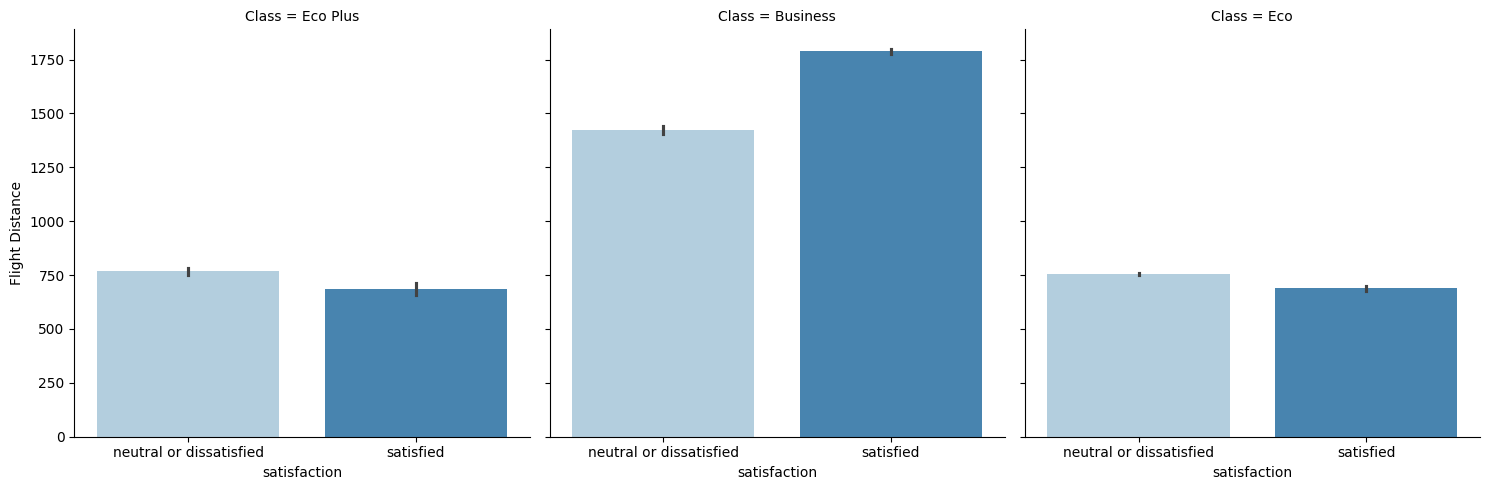

In [33]:
g = sns.catplot(x="satisfaction", y="Flight Distance", col="Class", data=df1, kind="bar", hue="satisfaction", palette="Blues")

Most of the people traveled in business class

Eco plus and Eco class are not liked by many peole

In [34]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

<ipython-input-34-ca3491c47679>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-34-ca3491c47679>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)


In [35]:
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

<ipython-input-35-9d6214f064b8>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


(74931, 23)

<ipython-input-36-8b2d2987e04f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


<Axes: >

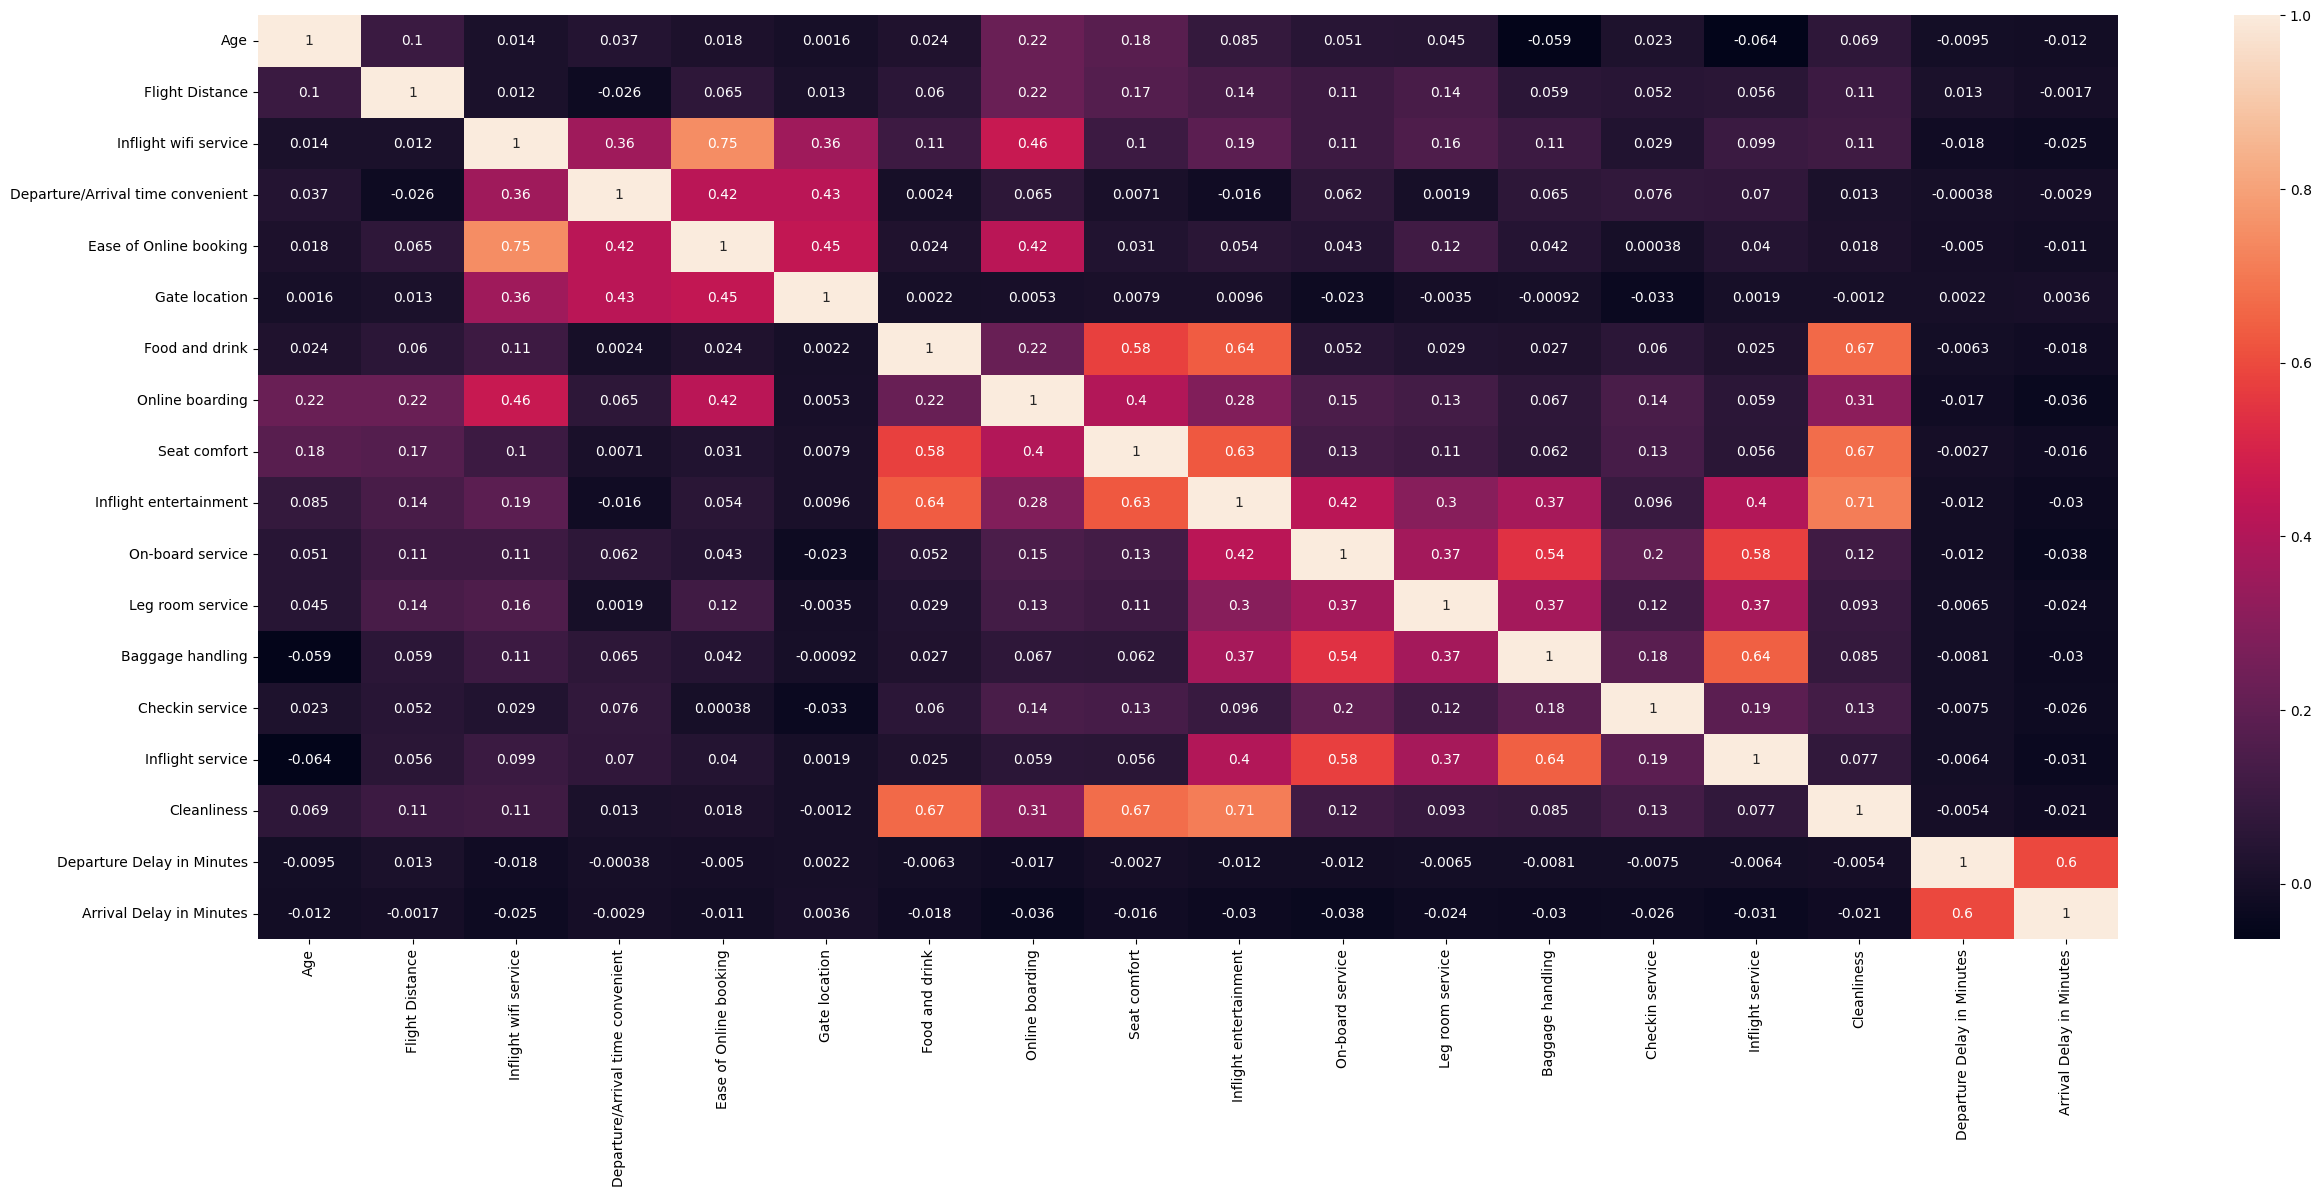

In [36]:
plt.figure(figsize=(30,12))
sns.heatmap(df1.corr(), annot=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in df1.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df1[col] = lencoders[col].fit_transform(df1[col])

<ipython-input-37-334d33c7a828>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = lencoders[col].fit_transform(df1[col])
<ipython-input-37-334d33c7a828>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = lencoders[col].fit_transform(df1[col])
<ipython-input-37-334d33c7a828>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

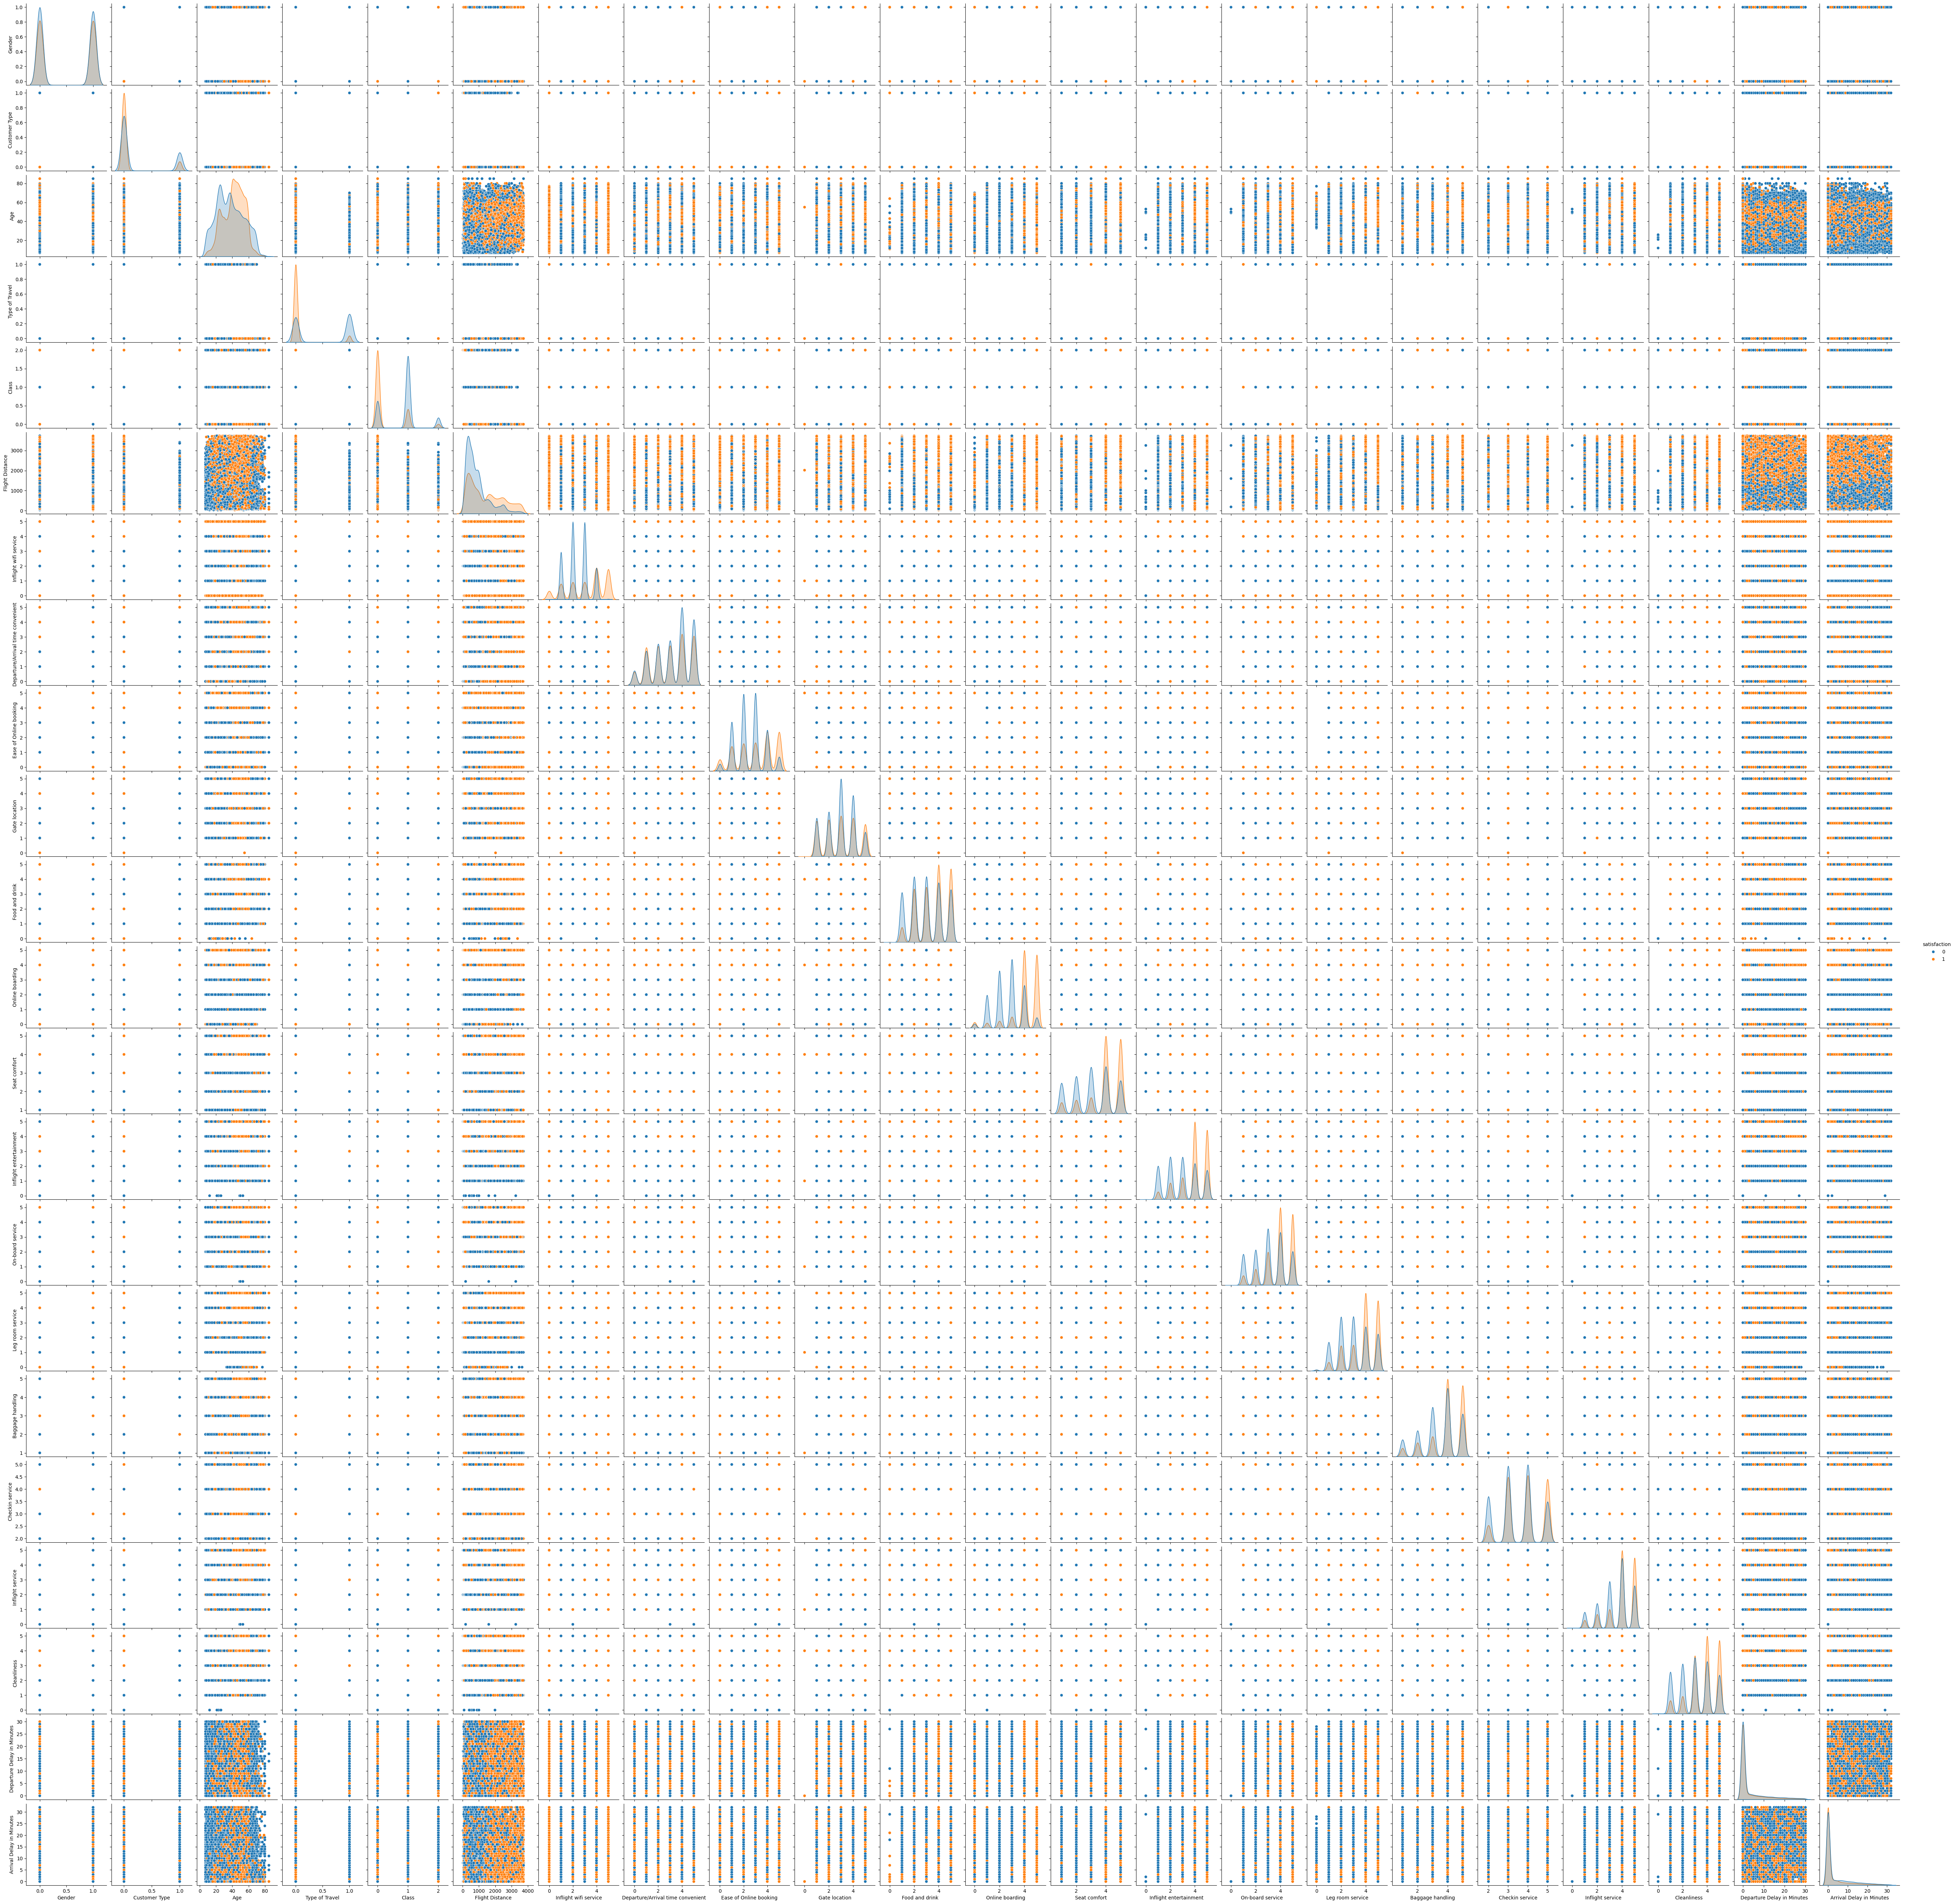

In [38]:
sns.pairplot(df1,hue="satisfaction")
plt.show()

When the distance traveled by the flight is high, more people like the travel

In [39]:
df1.head()

Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
2       0              0   26               0      0             1142   
4       1              0   61               0      0              214   
5       0              0   26               1      1             1180   
6       1              0   47               1      1             1276   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
2                      2                                  2   
4                      3                                  3   
5                      3                                  4   
6                      2                                  4   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                       3              1  ...                       5   
2                       2              2  ...                       5   
4                       3              3  ...                       3   
5                       2              1  ...                       1   
6                       2              3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
2                 4                 3                 4                4   
4                 3                 4                 4                3   
5                 3                 4                 4                4   
6                 3                 3                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
2                 4            5                           0   
4                 3            3                           0   
5                 4            1                           0   
6                 5            2                           9   

   Arrival Delay in Minutes  satisfaction  
0                      18.0             0  
2                       0.0             1  
4                       0.0             1  
5                       0.0             0  
6                      23.0             0  

[5 rows x 23 columns]

In [40]:
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df1)

df1 = pd.DataFrame(r_scaler.transform(df1), columns=df1.columns)
df1.head()

Gender  Customer Type       Age  Type of Travel  Class  Flight Distance  \
0     1.0            0.0  0.076923             1.0    1.0         0.115789   
1     0.0            0.0  0.243590             0.0    0.0         0.299865   
2     1.0            0.0  0.692308             0.0    0.0         0.049393   
3     0.0            0.0  0.243590             1.0    0.5         0.310121   
4     1.0            0.0  0.512821             1.0    0.5         0.336032   

   Inflight wifi service  Departure/Arrival time convenient  \
0                    0.6                                0.8   
1                    0.4                                0.4   
2                    0.6                                0.6   
3                    0.6                                0.8   
4                    0.4                                0.8   

   Ease of Online booking  Gate location  ...  Inflight entertainment  \
0                     0.6            0.2  ...                     1.0   
1                     0.4            0.4  ...                     1.0   
2                     0.6            0.6  ...                     0.6   
3                     0.4            0.2  ...                     0.2   
4                     0.4            0.6  ...                     0.4   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0               0.8               0.6              0.75         0.666667   
1               0.8               0.6              0.75         0.666667   
2               0.6               0.8              0.75         0.333333   
3               0.6               0.8              0.75         0.666667   
4               0.6               0.6              0.75         0.333333   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0               1.0          1.0                    0.833333   
1               0.8          1.0                    0.000000   
2               0.6          0.6                    0.000000   
3               0.8          0.2                    0.000000   
4               1.0          0.4                    0.300000   

   Arrival Delay in Minutes  satisfaction  
0                   0.56250           0.0  
1                   0.00000           1.0  
2                   0.00000           1.0  
3                   0.00000           0.0  
4                   0.71875           0.0  

[5 rows x 23 columns]

In [41]:
x = df1.drop("satisfaction", axis=1)
y = df1["satisfaction"]

In [42]:
x.shape

(74931, 22)

In [43]:
y.shape

(74931,)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [45]:
class Logistic_Regression():


  # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y



    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))


    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y))

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) ))
    Y_pred = np.where( Y_pred > 0.5, 1, 0)
    return Y_pred

In [46]:
classifier = Logistic_Regression(learning_rate=0.01, no_of_iterations=1000)

In [47]:
classifier.fit(X_train, y_train)

In [48]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, roc_curve, auc, precision_score,recall_score, f1_score

In [49]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( y_test, X_test_prediction)
precision = precision_score(y_test, X_test_prediction)
recall = recall_score(y_test, X_test_prediction)
f1 = f1_score(y_test, X_test_prediction)

In [50]:
print('Accuracy score of the test data : ', test_data_accuracy)
print('precision score of the test data : ', precision)
print('Recall score of the test data : ', recall)
print('F1 score of the test data : ', f1)

Accuracy score of the test data :  0.8267832121171682
precision score of the test data :  0.7919372294372294
Recall score of the test data :  0.8469328703703703
F1 score of the test data :  0.8185123042505593


In [51]:
print("\nClassification Report:\n", classification_report(y_test, X_test_prediction))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      8075
         1.0       0.79      0.85      0.82      6912

    accuracy                           0.83     14987
   macro avg       0.83      0.83      0.83     14987
weighted avg       0.83      0.83      0.83     14987



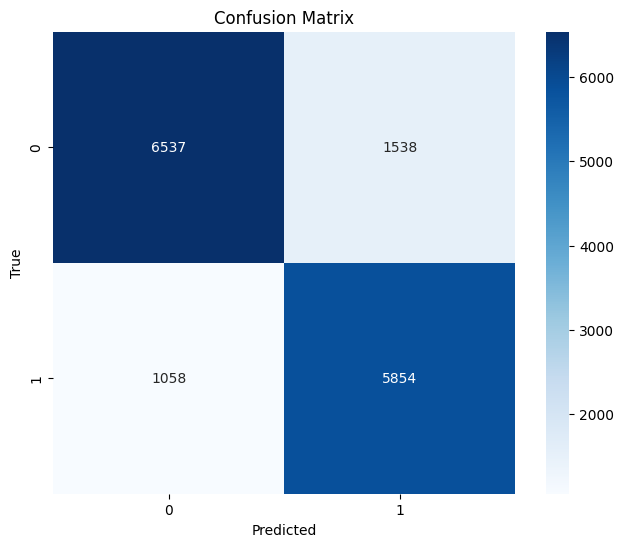

In [52]:
cm = confusion_matrix(y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

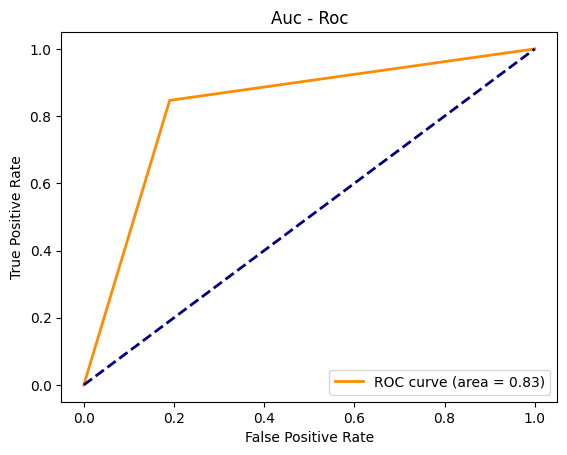

In [53]:
fpr, tpr, thresholds = roc_curve(y_test,X_test_prediction )
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Auc - Roc')
plt.legend(loc="lower right")
plt.show()

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [57]:
print('Accuracy score of the test data : ', accuracy)
print('precision score of the test data : ', precision)
print('Recall score of the test data : ', recall)
print('F1 score of the test data : ', f1)

Accuracy score of the test data :  0.8759591646093281
precision score of the test data :  0.8820505065779525
Recall score of the test data :  0.8438946759259259
F1 score of the test data :  0.8625508317929759


In [58]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.90      0.89      8075
         1.0       0.88      0.84      0.86      6912

    accuracy                           0.88     14987
   macro avg       0.88      0.87      0.87     14987
weighted avg       0.88      0.88      0.88     14987



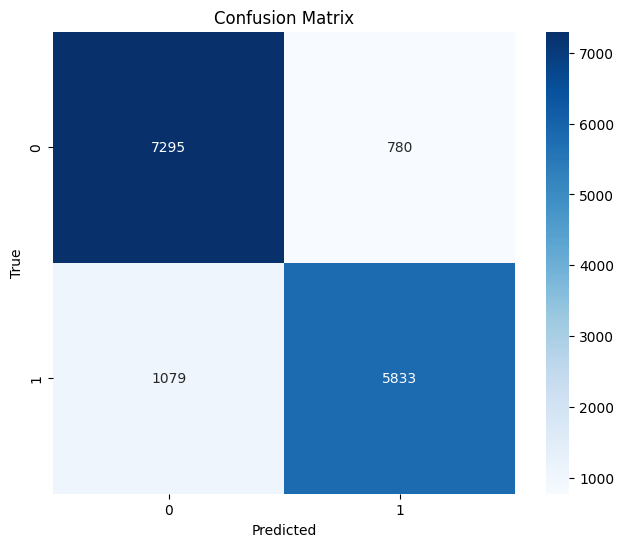

In [59]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

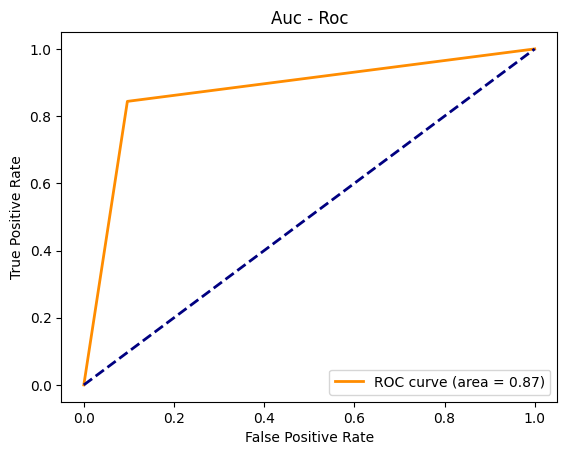

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Auc - Roc')
plt.legend(loc="lower right")
plt.show()

---------------------------------------Summary---------------------------------

Data set Name - Flight Service

Data set size - 103904

Data set shape - (103904, 25)

1) Data Cleaning

-> Droping Duplicates  

-> Checking Null Values

-> Filling null values using mode, mean, median, std, RandomForestRegressor

2) Data Visualization

  When the distance traveled by the flight is high, more people like the travel
  Our model

  Most of the people traveled in business class

  Eco plus and Eco class are not liked by many peole

  Clealiness is liked by most of the people

  Online booking is not liked by many people

  Dissatisfied or neutral count more than satisfied count

  Male and Female passengers counts are more are less equal

  Satisfied people count is more than neutral or dissatisfied

3)Model Building

  Model - Logistic Regression

4)Model Bench Mark

Accuracy score of the test data :  0.8267832121171682

precision score of the test data :  0.7919372294372294

Recall score of the test data :  0.8469328703703703

F1 score of the test data :  0.8185123042505593


  For Sklearn model:
  
Accuracy score of the test data :  0.8759591646093281

precision score of the test data :  0.8820505065779525

Recall score of the test data :  0.8438946759259259

F1 score of the test data :  0.8625508317929759
